In [113]:
%matplotlib widget
from Model.Environment import Environment
from Interface.Classes.GameEditor import EnvironmentWidget
from Interface.Classes.EnvGraphDisplay import EnvGraphDisplay
from Model.NashQLearning import *
from Interface.Classes.FinalDisplay import FinalDisplay
import ipywidgets as widgets
from IPython.display import display

# autoreload   
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
env = Environment()

games = env.getGames()

games[0].setPossibleActions(np.array([2, 2]))
#games[0].setPossibleActions((2, 2))
print("–––––––––––")
print(games[0])
games[0].setTransition((0, 0), 1, 1)
games[0].setPayoff((0, 0), np.array([1,1]))
print("–––––––––––")
print(games[0])
games[0].setTransition((1, 0), 0, 1)
games[0].setPayoff((1, 0), np.array([0,0]))
print("–––––––––––")
print(games[0])
games[0].setTransition((0, 1), 0, 1)
games[0].setPayoff((0, 1), np.array([0,0]))
print("–––––––––––")
print(games[0])
games[0].setTransition((1, 1), 0, 1)
games[0].setPayoff((1, 1), np.array([-1,-1]))
print("–––––––––––")
print(games[0])
###############################################

games[1].setPossibleActions(np.array([2, 2]))
#games[1].setPossibleActions((2, 2))
print("–––––––––––")
print(games[1])
games[1].setTransition((0, 0), 0, 1)
games[1].setPayoff((0, 0), np.array([1,1]))
print("–––––––––––")
print(games[1])

games[1].setTransition((1, 0), 1, 1)
games[1].setPayoff((1, 0), np.array([0,0]))
print("–––––––––––")
print(games[1])

games[1].setTransition((0, 1), 1, 1)
games[1].setPayoff((0, 1), np.array([0,0]))
print("–––––––––––")
print(games[1])

games[1].setTransition((1, 1), 1, 1)
games[1].setPayoff((1, 1), np.array([-1,-1]))
print("–––––––––––")
print(games[1])

–––––––––––
Game: [2 2] 
 PossibileActions:[2 2] 
 NPlayers: 2 
 Transition: ['{}', '{}', '{}', '{}'] 
 Payoff: [[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]
–––––––––––
Game: [2 2] 
 PossibileActions:[2 2] 
 NPlayers: 2 
 Transition: ['{1: 1}', '{}', '{}', '{}'] 
 Payoff: [[[1. 1.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]
–––––––––––
Game: [2 2] 
 PossibileActions:[2 2] 
 NPlayers: 2 
 Transition: ['{1: 1}', '{}', '{0: 1}', '{}'] 
 Payoff: [[[1. 1.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]
–––––––––––
Game: [2 2] 
 PossibileActions:[2 2] 
 NPlayers: 2 
 Transition: ['{1: 1}', '{0: 1}', '{0: 1}', '{}'] 
 Payoff: [[[1. 1.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]
–––––––––––
Game: [2 2] 
 PossibileActions:[2 2] 
 NPlayers: 2 
 Transition: ['{1: 1}', '{0: 1}', '{0: 1}', '{0: 1}'] 
 Payoff: [[[ 1.  1.]
  [ 0.  0.]]

 [[ 0.  0.]
  [-1. -1.]]]
–––––––––––
Game: [2 2] 
 PossibileActions:[2 2] 
 NPlayers: 2 
 Transition: ['{}', '{}', '{}', '{}'] 
 Payoff: [[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]
–––––––––––
Game

updating graph
Current games:  [<Model.Environment.Game object at 0x0000029C56A51A80>
Game:  Game: [2 2] 
 PossibileActions:[2 2] 
 NPlayers: 2 
 Transition: ['{1: 1}', '{0: 1}', '{0: 1}', '{0: 1}'] 
 Payoff: [[[ 1.  1.]
  [ 0.  0.]]

 [[ 0.  0.]
  [-1. -1.]]]
Action:  [0 0]
Transition: g, p= 1 1
Action:  [0 1]
Transition: g, p= 0 1
Action:  [1 0]
Transition: g, p= 0 1
Action:  [1 1]
Transition: g, p= 0 1
Game:  Game: [2 2] 
 PossibileActions:[2 2] 
 NPlayers: 2 
 Transition: ['{0: 1}', '{1: 1}', '{1: 1}', '{1: 1}'] 
 Payoff: [[[ 1.  1.]
  [ 0.  0.]]

 [[ 0.  0.]
  [-1. -1.]]]
Action:  [0 0]
Transition: g, p= 0 1
Action:  [0 1]
Transition: g, p= 1 1
Action:  [1 0]
Transition: g, p= 1 1
Action:  [1 1]
Transition: g, p= 1 1


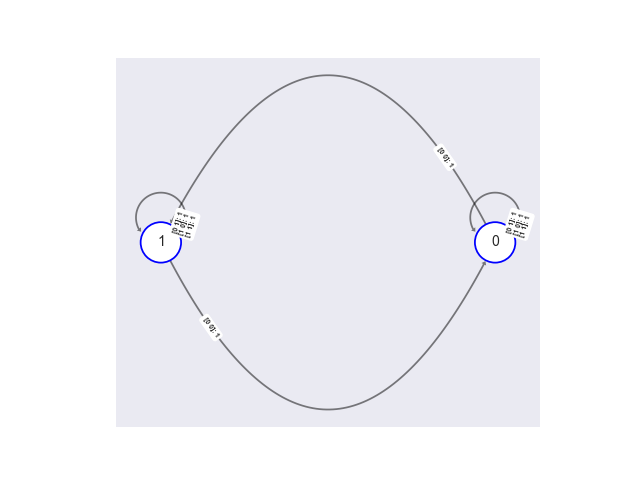

updating graph
Current games:  [<Model.Environment.Game object at 0x0000029C56A51A80>
Game:  Game: [2 2] 
 PossibileActions:[2 2] 
 NPlayers: 2 
 Transition: ['{1: 1}', '{0: 1}', '{0: 1}', '{0: 1}'] 
 Payoff: [[[ 1.  1.]
  [ 0.  0.]]

 [[ 0.  0.]
  [-1. -1.]]]
Action:  [0 0]
Transition: g, p= 1 1
Action:  [0 1]
Transition: g, p= 0 1
Action:  [1 0]
Transition: g, p= 0 1
Action:  [1 1]
Transition: g, p= 0 1
Game:  Game: [2 2] 
 PossibileActions:[2 2] 
 NPlayers: 2 
 Transition: ['{0: 1}', '{1: 1}', '{1: 1}', '{1: 1}'] 
 Payoff: [[[ 1.  1.]
  [ 0.  0.]]

 [[ 0.  0.]
  [-1. -1.]]]
Action:  [0 0]
Transition: g, p= 0 1
Action:  [0 1]
Transition: g, p= 1 1
Action:  [1 0]
Transition: g, p= 1 1
Action:  [1 1]
Transition: g, p= 1 1
updating graph
Current games:  [<Model.Environment.Game object at 0x0000029C56A51A80>]
Game:  Game: [2 2] 
 PossibileActions:[2 2] 
 NPlayers: 2 
 Transition: ['{1: 1}', '{0: 1}', '{0: 1}', '{0: 1}'] 
 Payoff: [[[ 1.  1.]
  [ 0.  0.]]

 [[ 0.  0.]
  [-1. -1.]]]
Action

In [115]:
# env = Environment(2, 2)
# env.getGame(0).setTransition(tuple([0, 0]), 0, 1)

envWidget = EnvironmentWidget(env)
envGraph = EnvGraphDisplay(env)

vBox = widgets.VBox([envWidget.getWidget(), envGraph.get_widget()])
display(vBox)

In [116]:
nashQLearning = NashQLearning(env)
display(nashQLearning.getDisplayable())

GridBox(children=(IntText(value=1, description='Episodes:'), FloatText(value=0.9, description='Gamma:'), Float…

In [117]:
finalDisplay = FinalDisplay(nashQLearning, env)
display(finalDisplay.get_widget())